<a href="https://colab.research.google.com/github/spaulsebastian/Algoritmos-de-Optimizacion/blob/main/Reto2/Algoritmos_R2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Reto 2

Nombre:<b> PAUL SEBASTIÁN SGUAY PUENTE</b> <br>
Github:https://github.com/spaulsebastian/Algoritmos-de-Optimizacion/blob/main/Reto2/Algoritmos_R2.ipynb <br>

## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

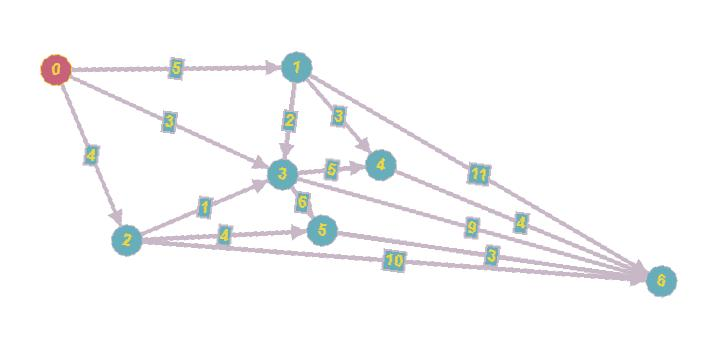

* Resuelve el problema del descenso por el rio utilizando la técnica de optimización que consideres más adecuada.

In [ ]:
#Viaje por el rio - Programación dinámica
################################################################################
'''
El algoritmo de Dijkstra es apropiado para este problema porque los costos de las aristas son no negativos
y el algoritmo es eficiente para encontrar el camino más corto desde un nodo de inicio hasta
un nodo de destino en un grafo ponderado, con una complejidad temporal razonable de O((V + E) log V),
donde V es el número de nodos y E es el número de aristas.

'''
import heapq

def dijkstra(graph, start, end):
    # Inicializamos los costos de todos los nodos como infinito
    distances = {node: float('inf') for node in graph}
    distances[start] = 0  # El costo para llegar al nodo de inicio es 0
    parents = {}  # Almacenará los padres de cada nodo en la ruta óptima
    # Inicializamos una cola de prioridad para almacenar los nodos por explorar
    pq = [(0, start)]  # (costo, nodo)

    while pq:
        # Extraemos el nodo con el costo mínimo de la cola de prioridad
        current_distance, current_node = heapq.heappop(pq)

        # Si hemos llegado al nodo de destino, podemos salir del ciclo
        if current_node == end:
            break

        # Iteramos sobre los nodos vecinos del nodo actual
        for neighbor, weight in graph[current_node]:
            # Calculamos el nuevo costo para llegar al vecino a través del nodo actual
            distance = current_distance + weight
            # Si encontramos un camino más corto hacia el vecino, actualizamos su costo
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                parents[neighbor] = current_node  # Almacenamos el padre del vecino
                # Agregamos el vecino a la cola de prioridad para explorar sus vecinos
                heapq.heappush(pq, (distance, neighbor))

    # Reconstruimos la ruta óptima desde el embarcadero de inicio hasta el de destino
    current_node = end
    path = []
    while current_node is not None:
        path.append(current_node)
        current_node = parents.get(current_node)  # Obtenemos el padre del nodo actual

    # Invertimos la ruta para que vaya del embarcadero de inicio al de destino
    path.reverse()
    return distances[end], path

# Datos del problema
river_trip = {
    0: [(1, 5), (3, 3), (2, 4)],
    1: [(3, 2), (4, 3), (6, 11)],
    2: [(3, 1), (5, 4), (6, 10)],
    3: [(4, 5), (6, 9), (5, 6)],
    4: [(6, 4)],
    5: [(6, 3)],
    6: []
}

start = 0
end = 6

# Encontrar la combinación más barata para viajar de start a end
costo_minimo, ruta_optima = dijkstra(river_trip, start, end)
print("El costo mínimo es:", costo_minimo)
print("La ruta óptima es:", ruta_optima)



El costo mínimo es: 11
La ruta óptima es: [0, 2, 5, 6]


## Descenso del gradiente

In [ ]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [ ]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

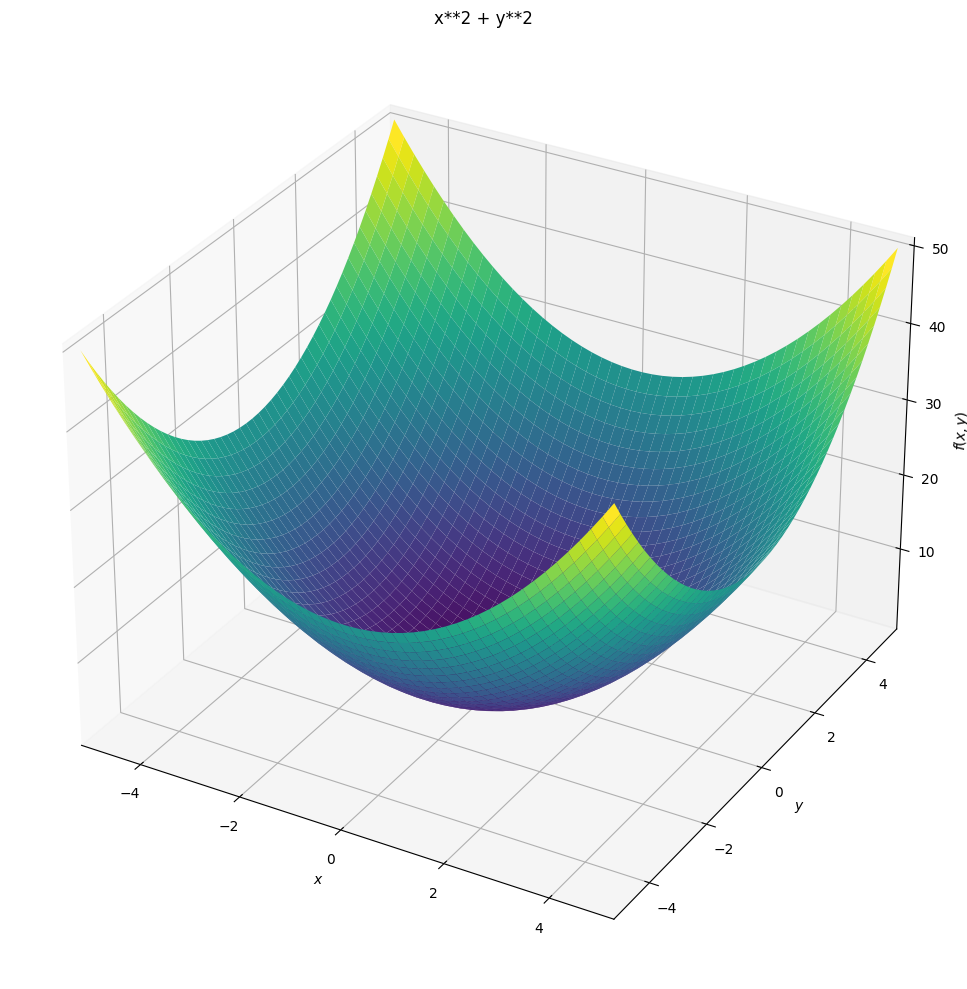

In [ ]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

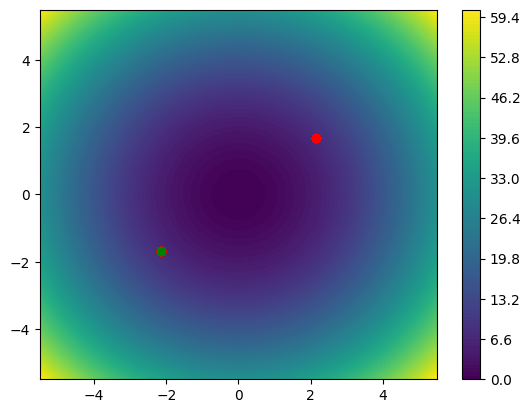

Solucion: [-2.135550472228794, -1.6754192222031996] 7.367605389564599


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z

resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=1

#Iteraciones:50
for _ in range(1000):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


## Reto

Optimizar la función siguiente mediante el algoritmo por descenso del gradiente.

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
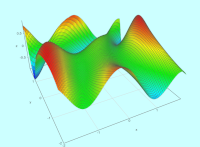


In [ ]:
#Definimos la funcion
import math

# Definimos la función f(x, y)
f = lambda x, y: math.sin(0.5 * x**2 - 0.25 * y**2 + 3) * math.cos(2*x + 1 - math.exp(y))

# Gradiente de f con respecto a x
def df_dx(x, y):
    return math.cos(0.5 * x**2 - 0.25 * y**2 + 3) * math.cos(2*x + 1 - math.exp(y)) - \
           2 * x * math.sin(0.5 * x**2 - 0.25 * y**2 + 3) * math.sin(2*x + 1 - math.exp(y))

# Gradiente de f con respecto a y
def df_dy(x, y):
    return 0.5 * y * math.cos(0.5 * x**2 - 0.25 * y**2 + 3) * math.sin(2*x + 1 - math.exp(y)) - \
           math.exp(y) * math.sin(0.5 * x**2 - 0.25 * y**2 + 3) * math.cos(2*x + 1 - math.exp(y))

In [ ]:
#Calcular Gradientes
def gradient_descent(f, df_dx, df_dy, gamma, tol, maxit):
    """
    Función para calcular el descenso de gradiente

    Argumentos:
    f: Función a minimizar
    df_dx: Derivada parcial de f respecto a x
    df_dy: Derivada parcial de f respecto a y
    gamma: Tasa de aprendizaje
    tol: Tolerancia para convergencia
    maxit: Número máximo de iteraciones
    """
    import numpy as np

    # Generamos un punto aleatorio como punto inicial
    np.random.seed(43)
    x0, y0 = np.random.uniform(low=-5, high=5, size=2)
    print(f"El punto inicial será ({x0}, {y0})")

    x = x0
    y = y0

    for i in range(maxit):
        gradient_x = df_dx(x, y)
        gradient_y = df_dy(x, y)

        x_new = x - gamma * gradient_x
        y_new = y - gamma * gradient_y

        # Verificar convergencia
        if abs(f(x_new, y_new) - f(x, y)) < tol:
            print(f"Convergió en la iteración {i}")
            return x_new, y_new

        x = x_new
        y = y_new

    print(f"No se alcanzó la convergencia después de {maxit} iteraciones.")
    return x, y

# Parámetros del algoritmo
gamma = 0.001
tol = 1e-4
maxit = 1000

# Ejecutar el algoritmo de descenso de gradiente
x_final, y_final = gradient_descent(f, df_dx, df_dy, gamma, tol, maxit)

# Imprimir resultado final
print("Resultado final:")
print(f"  Punto final: ({x_final}, {y_final})")
print(f"  Valor de f en el punto final: {f(x_final, y_final)}")

El punto inicial será (-3.8494543361022107, 1.090665392794814)
Convergió en la iteración 373
Resultado final:
  Punto final: (-3.7381433078057347, 1.4820055556310916)
  Valor de f en el punto final: 0.0015236086198651265


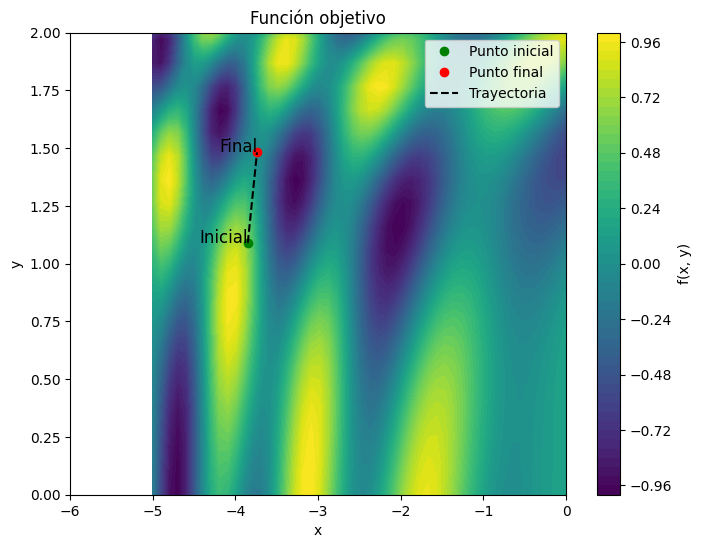

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función objetivo
f = lambda x, y: np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2*x + 1 - np.exp(y))

# Punto inicial y final
x_inicial, y_inicial = -3.8494543361022107, 1.090665392794814
x_final, y_final = -3.7381433078057347, 1.4820055556310916

# Generar los puntos para graficar la función
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Graficar la función
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Función objetivo')

# Graficar el punto inicial
plt.plot(x_inicial, y_inicial, 'go', label='Punto inicial')
plt.text(x_inicial, y_inicial, 'Inicial', fontsize=12, ha='right')  # Etiqueta del punto inicial

# Graficar el punto final
plt.plot(x_final, y_final, 'ro', label='Punto final')
plt.text(x_final, y_final, 'Final', fontsize=12, ha='right')  # Etiqueta del punto final

# Graficar la trayectoria del descenso de gradiente
plt.plot([x_inicial, x_final], [y_inicial, y_final], 'k--', label='Trayectoria')

# Ajustar los límites de los ejes x e y para ampliar el área de visualización
plt.xlim(-6, 0)
plt.ylim(0, 2)

plt.legend()
plt.show()

---
---
# FINAL